In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from matplotlib import style
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import signal
from pandas.plotting import autocorrelation_plot
style.use('dark_background')
import datetime
%matplotlib inline


In [3]:
dfa = pd.read_csv('acceleration.csv', header = 1, parse_dates=['Time'])
dft = pd.read_csv('temperature.csv', header = 1, parse_dates=['Time'])
dfv = pd.read_csv('velocity.csv', header = 1, parse_dates=['Time'])
dfa.head()

Time Övre fläkt främre
0 2021-12-09 09:42:35           15 m/s²
1 2021-12-09 09:43:35         15.5 m/s²
2 2021-12-09 09:44:35         15.1 m/s²
3 2021-12-09 09:45:35         14.7 m/s²
4 2021-12-09 09:46:36           13 m/s²

In [4]:
dfa.columns = ['time', 'acceleration']
dft.columns = ['time', 'temperature']
dfv.columns = ['time', 'velocity']
dfv.head()

time   velocity
0 2021-12-09 09:42:35  1.30 mm/s
1 2021-12-09 09:43:35  1.50 mm/s
2 2021-12-09 09:44:35  1.20 mm/s
3 2021-12-09 09:45:35  1.40 mm/s
4 2021-12-09 09:46:36  1.40 mm/s

In [5]:
dfa['acceleration'] = dfa['acceleration'].str.replace(' m/s²', '').astype(float)
dft['temperature'] = dft['temperature'].str.replace(' °C', '').astype(float)
dfv['velocity'] = dfv['velocity'].str.replace(' mm/s', '').astype(float)


In [6]:
df = pd.merge(dfa, dft, how='left', on='time')
df = pd.merge(df, dfv, how='left', on='time')

In [7]:
df

time  acceleration  temperature  velocity
0      2021-12-09 09:42:35          15.0         28.0       1.3
1      2021-12-09 09:43:35          15.5         28.0       1.5
2      2021-12-09 09:44:35          15.1         28.0       1.2
3      2021-12-09 09:45:35          14.7         28.0       1.4
4      2021-12-09 09:46:36          13.0         28.0       1.4
...                    ...           ...          ...       ...
262155 2022-06-09 09:37:31          14.0         30.5       1.7
262156 2022-06-09 09:38:31          13.8         30.5       1.5
262157 2022-06-09 09:39:31          14.6         30.5       1.7
262158 2022-06-09 09:40:32          13.7         30.5       1.8
262159 2022-06-09 09:41:31          13.9         30.5       1.7

[262160 rows x 4 columns]

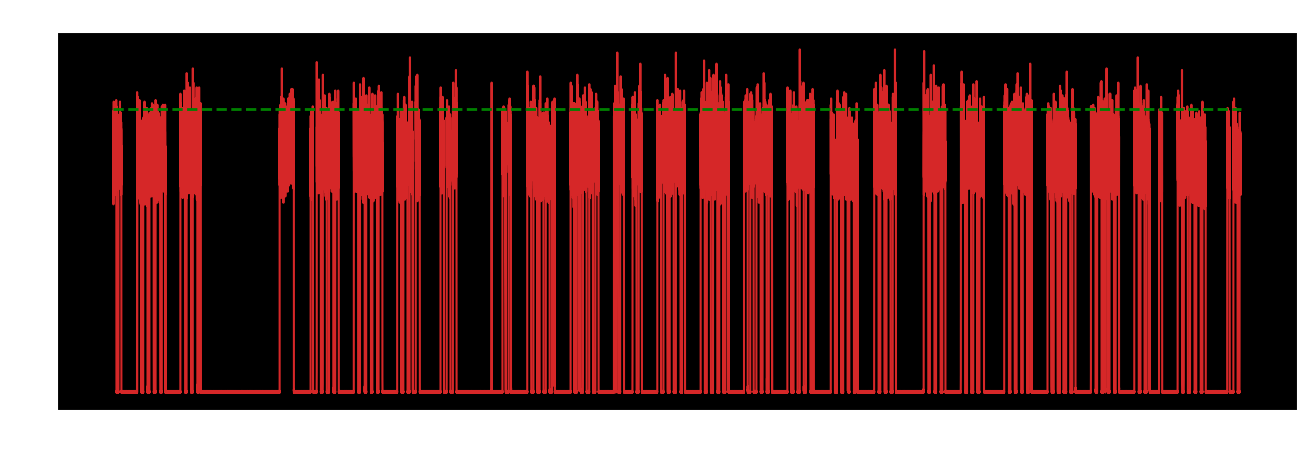

In [8]:
#Plot Timeseries Acceleration
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df['time'], df['acceleration'], color='tab:red')
_=plt.hlines(y=[18], xmin=df['time'][0], xmax=df['time'][len(df)-1], colors='green', ls='--', lw=2, label='vline_multiple - full height')
# ax.hlines(y=[18], xmin=df['time'][0], xmax=df['time'][len(df)-1], colors='purple', ls='--', lw=2, label='vline_multiple - full height')
plt.gca().set(title='acceleration', xlabel='date', ylabel='m/s2')
plt.show()





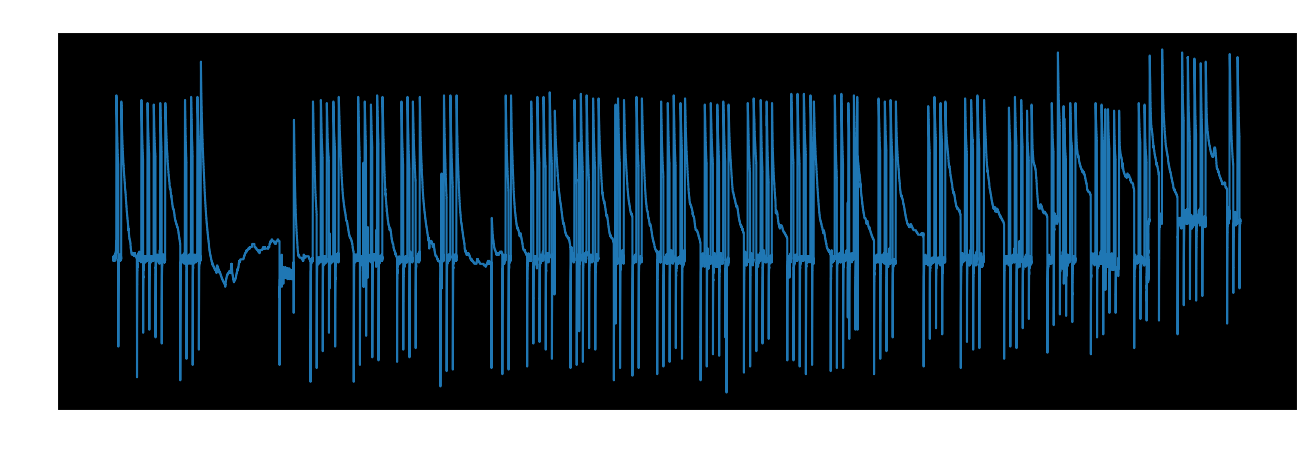

In [9]:
#Plot Timeseries Acceleration
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df['time'], df['temperature'], color='tab:blue')
plt.gca().set(title='temperature', xlabel='date', ylabel='C')
plt.show()

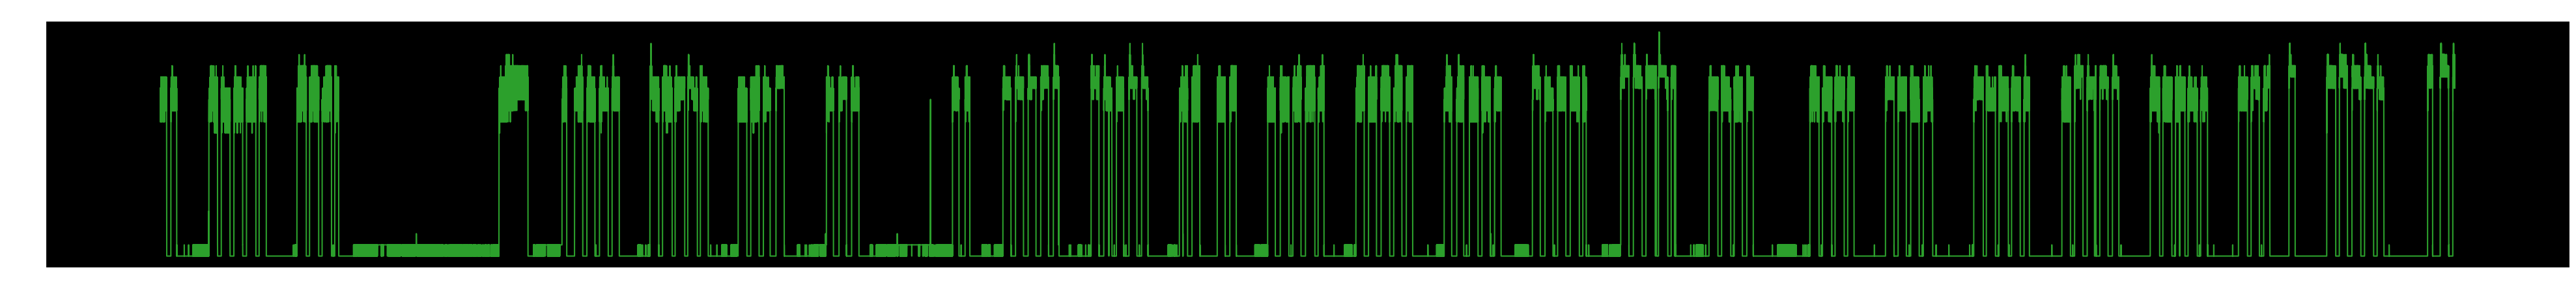

In [10]:
#Plot Timeseries Acceleration
plt.figure(figsize=(50,5), dpi=100)
plt.plot(df['time'], df['velocity'], color='tab:green')
plt.gca().set(title='velocity', xlabel='date', ylabel='mm/s')
plt.show()

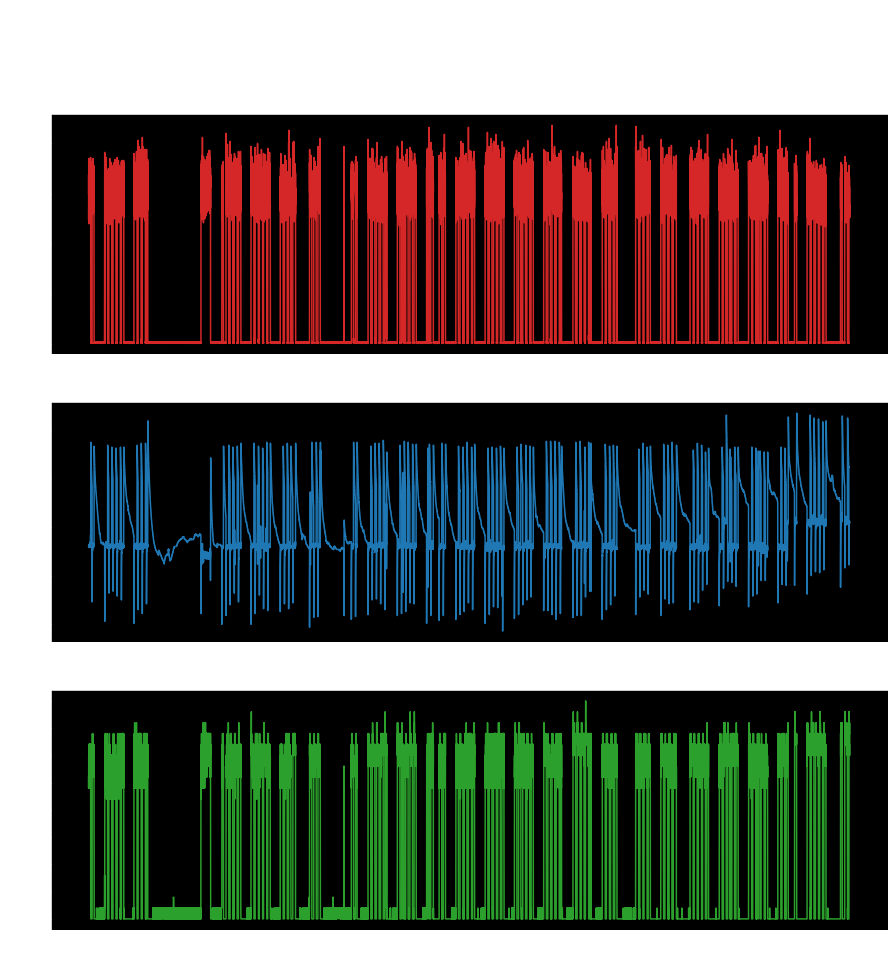

In [11]:
fig,(ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Time Series of Acceleration, Temperature and Velocity')
ax1.plot(df['time'], df['acceleration'], color='tab:red')
# _ = ax1.hlines(y=[18], xmin=0, xmax=len(df['time']) , colors='purple', ls='--', lw=2, label='vline_multiple - full height')
ax1.set(ylabel= 'm/s2')
ax2.set(ylabel= 'Celsius')
ax3.set(ylabel= 'mm/s')
ax2.plot(df['time'], df['temperature'], color='tab:blue')
ax3.plot(df['time'], df['velocity'], color='tab:green')
fig.set_figheight(15)
fig.set_figwidth(15)



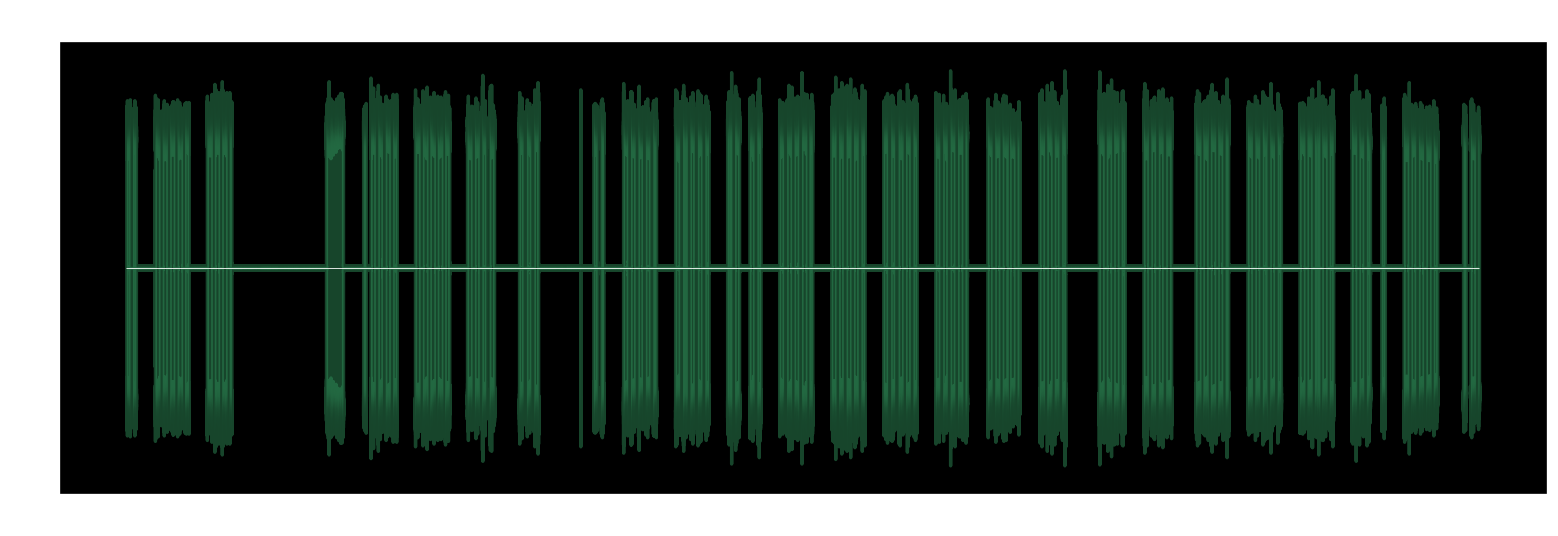

In [12]:
# Mirror axis
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(df['time'], y1=df['acceleration'], y2=-df['acceleration'], alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-25, 25)
plt.title('Acceleration two side view', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.time), xmax=np.max(df.time), linewidth=.5)
plt.show()

In [13]:
#groupby day
df_day = df.groupby([df['time'].dt.date]).mean()
df_day

acceleration  temperature  velocity
time                                           
2021-12-09     12.249360    29.716880  1.192666
2021-12-10      6.948506    32.158443  0.652606
2021-12-11      0.152014    31.837014  0.000208
2021-12-12      0.149305    28.557302  0.075869
2021-12-13     10.128125    28.371597  0.990694
...                  ...          ...       ...
2022-06-05      0.157083    34.427569  0.000000
2022-06-06      0.158611    33.061736  0.000000
2022-06-07      5.840000    33.631250  0.648958
2022-06-08      9.497568    32.232245  1.135094
2022-06-09      5.721306    34.560481  0.643127

[183 rows x 3 columns]

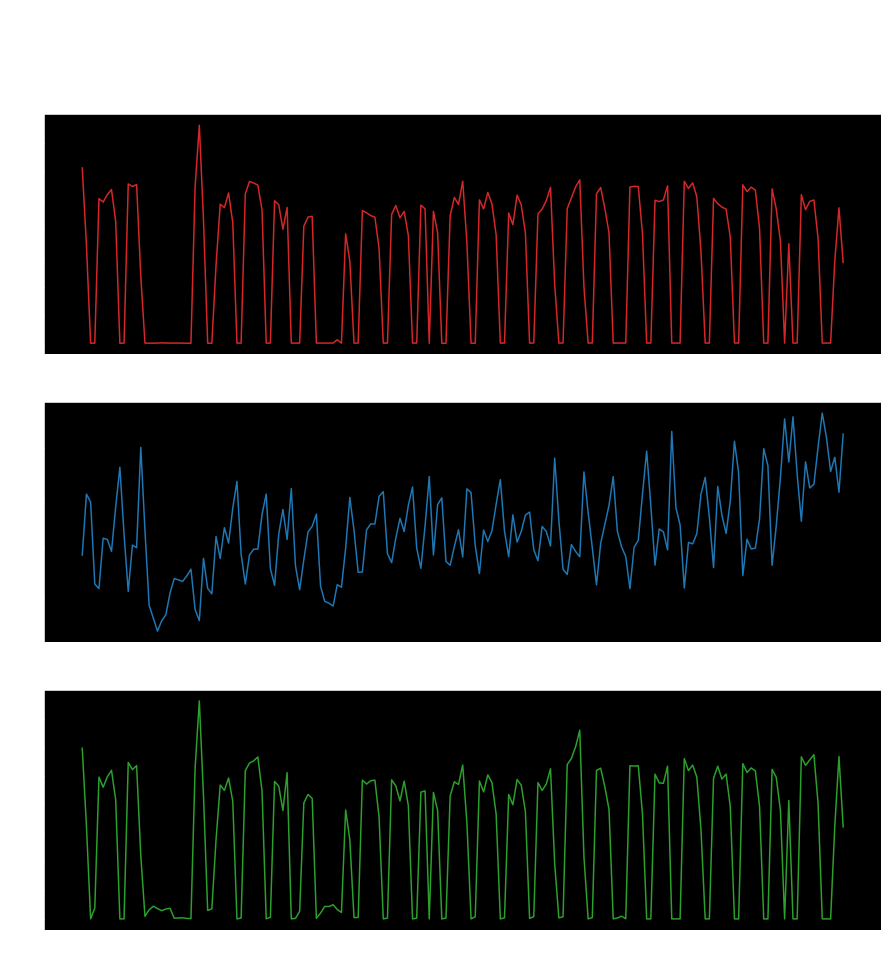

In [14]:
#Plot by day
fig,(ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Time Series of Acceleration, Temperature and Velocity')
ax1.plot(df_day.index, df_day['acceleration'], color='tab:red')
ax1.set(ylabel= 'm/s2')
ax2.set(ylabel= 'Celsius')
ax3.set(ylabel= 'mm/s')
ax2.plot(df_day.index, df_day['temperature'], color='tab:blue')
ax3.plot(df_day.index, df_day['velocity'], color='tab:green')
fig.set_figheight(15)
fig.set_figwidth(15)


In [15]:
df

time  acceleration  temperature  velocity
0      2021-12-09 09:42:35          15.0         28.0       1.3
1      2021-12-09 09:43:35          15.5         28.0       1.5
2      2021-12-09 09:44:35          15.1         28.0       1.2
3      2021-12-09 09:45:35          14.7         28.0       1.4
4      2021-12-09 09:46:36          13.0         28.0       1.4
...                    ...           ...          ...       ...
262155 2022-06-09 09:37:31          14.0         30.5       1.7
262156 2022-06-09 09:38:31          13.8         30.5       1.5
262157 2022-06-09 09:39:31          14.6         30.5       1.7
262158 2022-06-09 09:40:32          13.7         30.5       1.8
262159 2022-06-09 09:41:31          13.9         30.5       1.7

[262160 rows x 4 columns]

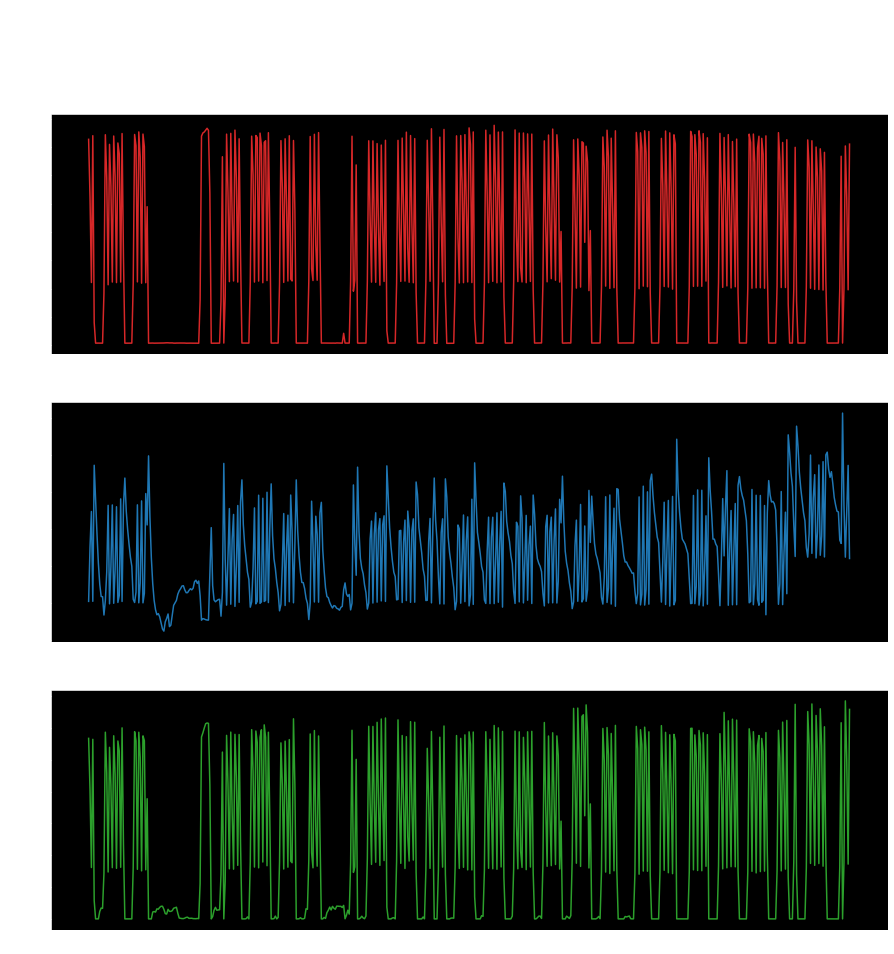

In [16]:
#Groupby halfday (or in this case 8 hours)
# index = pd.date_range(start = '2021-12-09', end = '2022-06-09', freq='8H')
df_halfday = df.resample('8H',on='time').mean()
df_halfday
fig,(ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Time Series of Acceleration, Temperature and Velocity')
ax1.plot(df_halfday.index, df_halfday['acceleration'], color='tab:red')
ax1.set(ylabel= 'm/s2')
ax2.set(ylabel= 'Celsius')
ax3.set(ylabel= 'mm/s')
ax2.plot(df_halfday.index, df_halfday['temperature'], color='tab:blue')
ax3.plot(df_halfday.index, df_halfday['velocity'], color='tab:green')
fig.set_figheight(15)
fig.set_figwidth(15)

In [17]:
# Create week column
df_day['day'] = [d.strftime('%a') for d in df_day.index]
df_day['month'] = [d.strftime('%b') for d in df_day.index]
df_day['week'] = [d.strftime('%U') for d in df_day.index]
df_day['hour'] = [d.strftime('%U') for d in df_day.index]
df_day

acceleration  temperature  velocity  day month week hour
time                                                                
2021-12-09     12.249360    29.716880  1.192666  Thu   Dec   49   49
2021-12-10      6.948506    32.158443  0.652606  Fri   Dec   49   49
2021-12-11      0.152014    31.837014  0.000208  Sat   Dec   49   49
2021-12-12      0.149305    28.557302  0.075869  Sun   Dec   50   50
2021-12-13     10.128125    28.371597  0.990694  Mon   Dec   50   50
...                  ...          ...       ...  ...   ...  ...  ...
2022-06-05      0.157083    34.427569  0.000000  Sun   Jun   23   23
2022-06-06      0.158611    33.061736  0.000000  Mon   Jun   23   23
2022-06-07      5.840000    33.631250  0.648958  Tue   Jun   23   23
2022-06-08      9.497568    32.232245  1.135094  Wed   Jun   23   23
2022-06-09      5.721306    34.560481  0.643127  Thu   Jun   23   23

[183 rows x 7 columns]

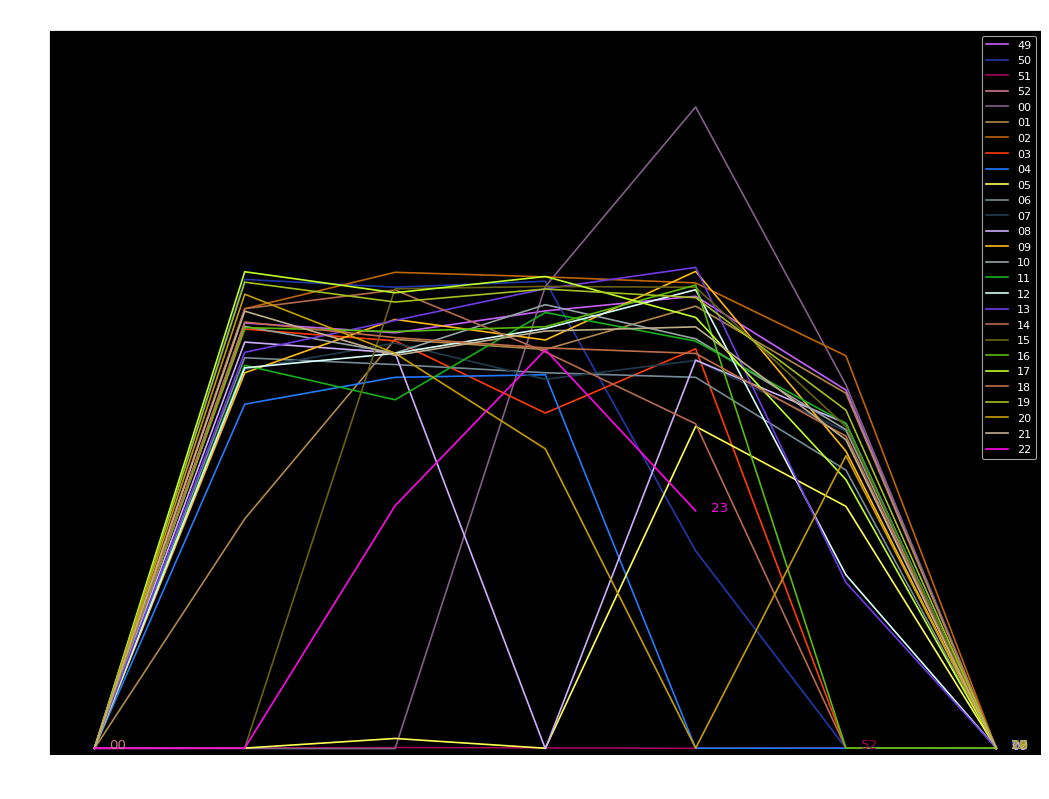

In [18]:
# Prepare data for seasonal plot on a weekly basis (acceleration)

weeks=df_day['week'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'acceleration', data=df_day.loc[df_day.week==m, :], color=mycolors[i], label=m)
        plt.text(df_day.loc[df_day.week==m, :].shape[0]-.9, df_day.loc[df_day.week==m, 'acceleration'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(0, 17), ylabel='$Acceleration$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of acceleration by day of the week", fontsize=20)
plt.legend(weeks)
plt.show()


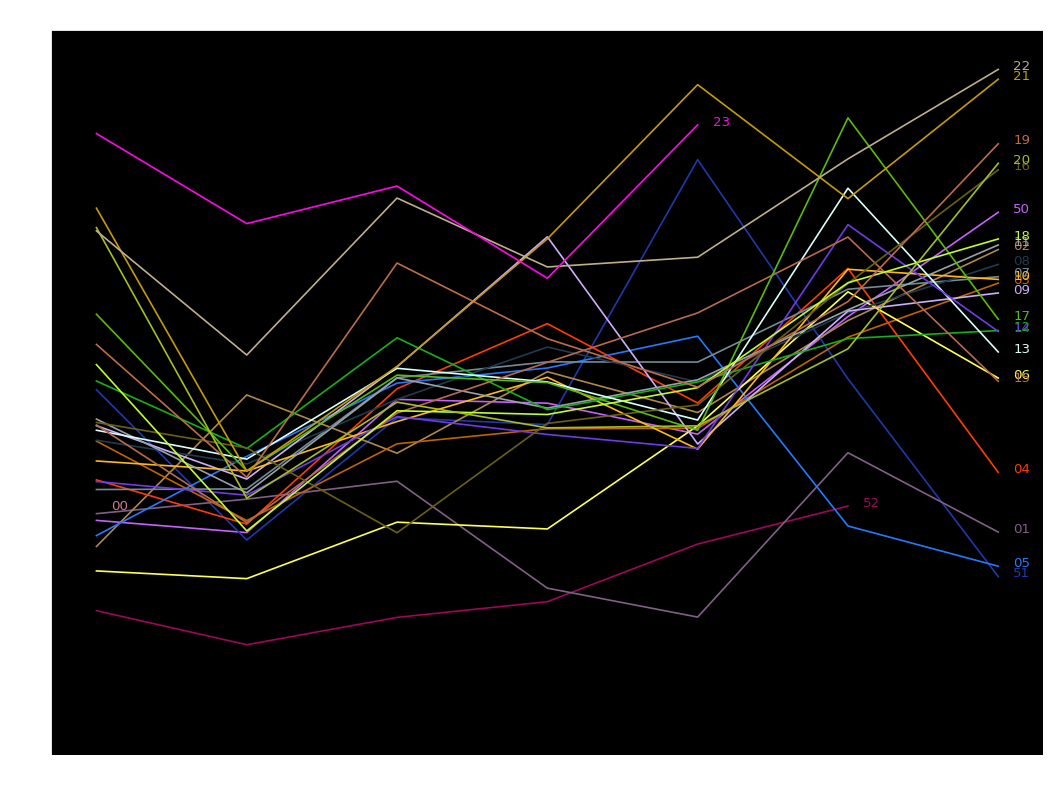

In [19]:
# Prepare data for seasonal plot on a weekly basis (temperature)

weeks=df_day['week'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'temperature', data=df_day.loc[df_day.week==m, :], color=mycolors[i], label=m)
        plt.text(df_day.loc[df_day.week==m, :].shape[0]-.9, df_day.loc[df_day.week==m, 'temperature'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(25, 36), ylabel='$temperature$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of temperature by day of the week", fontsize=20)
# plt.legend(weeks)
plt.show()


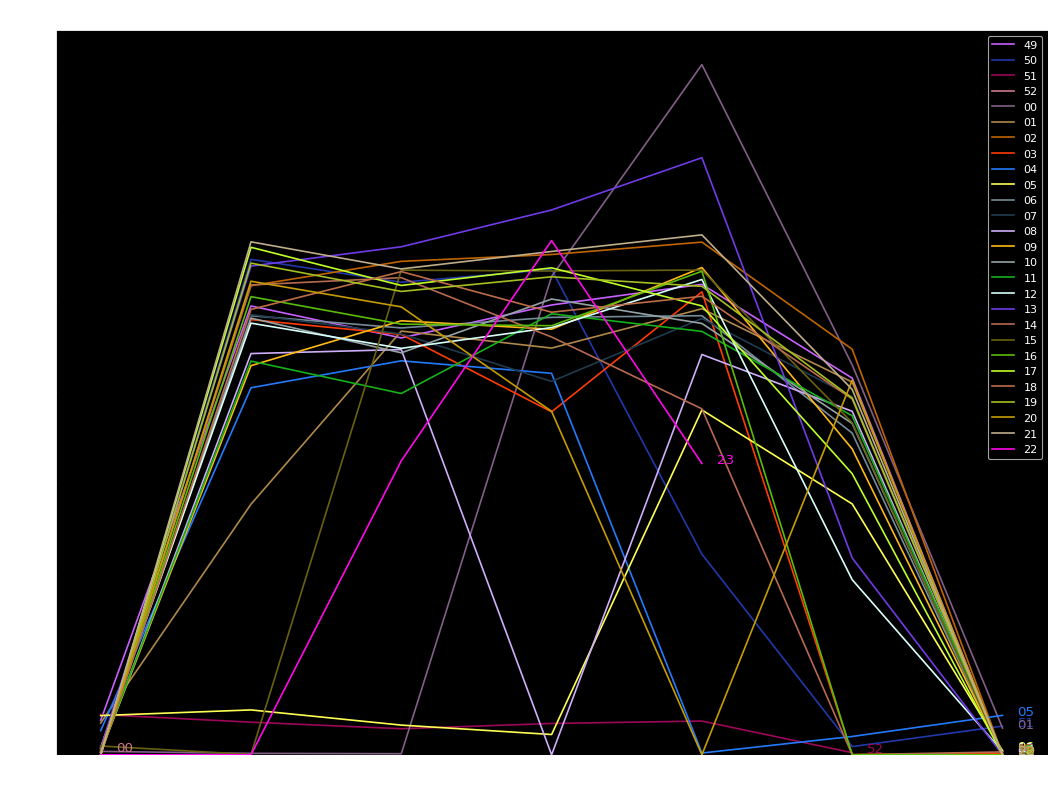

In [20]:
# Prepare data for seasonal plot on a weekly basis (velocity)

weeks=df_day['week'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'velocity', data=df_day.loc[df_day.week==m, :], color=mycolors[i], label=m)
        plt.text(df_day.loc[df_day.week==m, :].shape[0]-.9, df_day.loc[df_day.week==m, 'velocity'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(0, 1.6), ylabel='$velocity$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of velocity by day of the week", fontsize=20)
plt.legend(weeks)
plt.show()


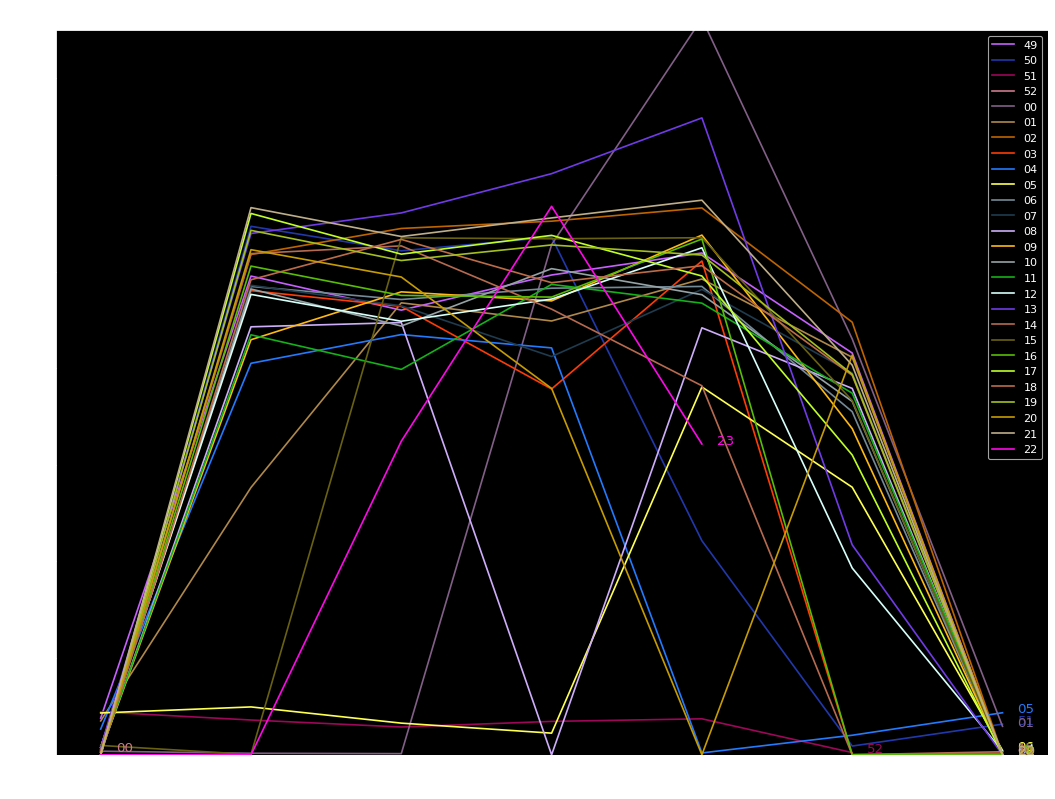

In [21]:
# Prepare data for seasonal plot on a weekly basis (velocity)

weeks=df_day['week'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('day', 'velocity', data=df_day.loc[df_day.week==m, :], color=mycolors[i], label=m)
        plt.text(df_day.loc[df_day.week==m, :].shape[0]-.9, df_day.loc[df_day.week==m, 'velocity'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(0, 1.5), ylabel='$velocity$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of velocity by day of the week", fontsize=20)
plt.legend(weeks)
plt.show()

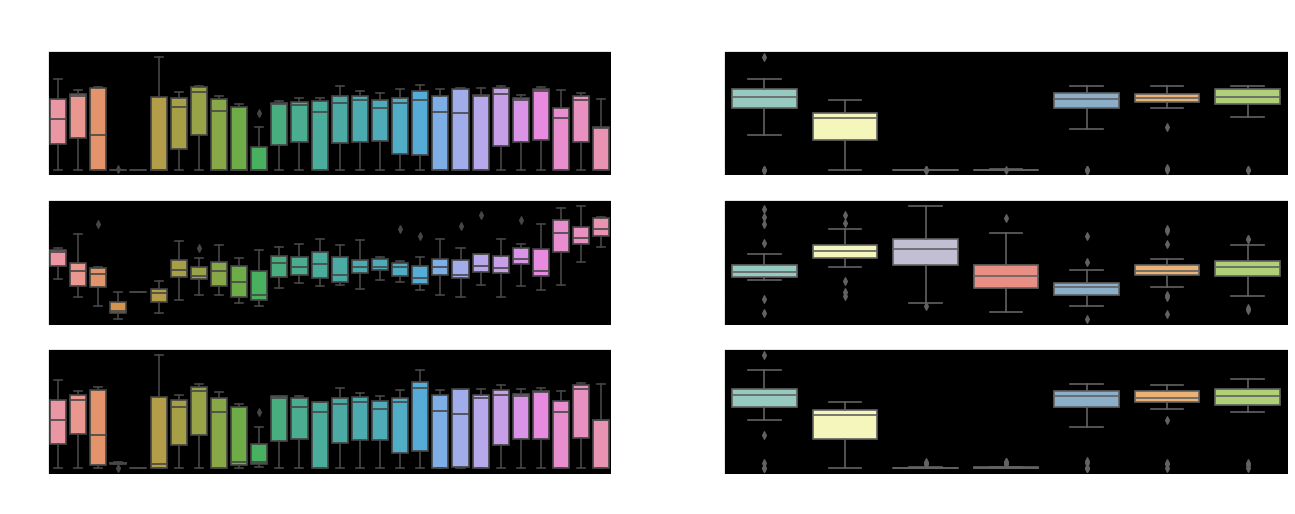

In [22]:
#Box plot of daily based on week of the year

# Draw Plot
fig, axes = plt.subplots(3, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='week', y='acceleration', data=df_day, ax=axes[0,0])
sns.boxplot(x='day', y='acceleration', data=df_day.loc[~df_day.week.isin([1, 52]), :], ax=axes[0,1])
sns.boxplot(x='week', y='temperature', data=df_day, ax=axes[1,0])
sns.boxplot(x='day', y='temperature', data=df_day.loc[~df_day.week.isin([1, 52]), :], ax=axes[1,1])
sns.boxplot(x='week', y='velocity', data=df_day, ax=axes[2,0])
sns.boxplot(x='day', y='velocity', data=df_day.loc[~df_day.week.isin([1, 52]), :], ax=axes[2,1])

# Set Title
axes[0,0].set_title('Week-wise Box Plot\n(The Trend)', fontsize=18); 
axes[0,1].set_title('Day-wise Box Plot\n(The Seasonality)', fontsize=18)

plt.show()

In [23]:
#lets do the same analysis but on a daily basis removing weekends and using the median to account for extremes

df_hour = df.resample('H',on='time').median()
df_hour['weekday'] = [d.strftime('%a') for d in df_hour.index]
df_hour['hour'] = [d.strftime('%H') for d in df_hour.index]
df_hour['yearweek'] = [d.strftime('%W') for d in df_hour.index]
df_hour['month'] = [d.strftime('%b') for d in df_hour.index]
df_hour['yearday'] = [d.strftime('%j') for d in df_hour.index]
df_hour['year'] = [d.strftime('%Y') for d in df_hour.index]
df_hour['hour']=df_hour['hour'].astype(int)

df_hour = df_hour[~df_hour['weekday'].isin(['Sun', 'Sat'])]
df_hour = df_hour[~df_hour['hour'].isin([22,23,24,0,1,2,3,4,5])]
df_hour.head()


acceleration  temperature  velocity weekday  hour  \
time                                                                     
2021-12-09 09:00:00         14.75         28.0       1.4     Thu     9   
2021-12-09 10:00:00         14.20         28.0       1.4     Thu    10   
2021-12-09 11:00:00         14.45         28.1       1.4     Thu    11   
2021-12-09 12:00:00         14.25         28.0       1.4     Thu    12   
2021-12-09 13:00:00         14.45         28.1       1.4     Thu    13   

                    yearweek month yearday  year  
time                                              
2021-12-09 09:00:00       49   Dec     343  2021  
2021-12-09 10:00:00       49   Dec     343  2021  
2021-12-09 11:00:00       49   Dec     343  2021  
2021-12-09 12:00:00       49   Dec     343  2021  
2021-12-09 13:00:00       49   Dec     343  2021

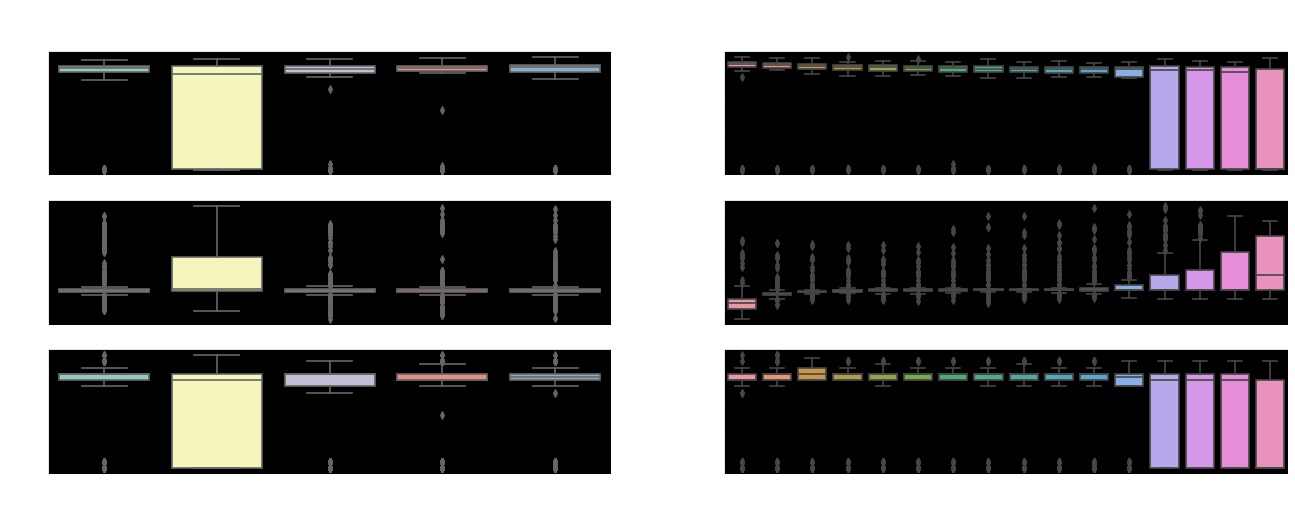

In [24]:
#Box plot of hourly based on day of the weekday

# Draw Plot
fig, axes = plt.subplots(3, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='weekday', y='acceleration', data=df_hour, ax=axes[0,0])
sns.boxplot(x='hour', y='acceleration', data=df_hour.loc[~df_hour.weekday.isin([1, 52]), :], ax=axes[0,1])
sns.boxplot(x='weekday', y='temperature', data=df_hour, ax=axes[1,0])
sns.boxplot(x='hour', y='temperature', data=df_hour.loc[~df_hour.weekday.isin([1, 52]), :], ax=axes[1,1])
sns.boxplot(x='weekday', y='velocity', data=df_hour, ax=axes[2,0])
sns.boxplot(x='hour', y='velocity', data=df_hour.loc[~df_hour.weekday.isin([1, 52]), :], ax=axes[2,1])

# Set Title
axes[0,0].set_title('Weekday-wise Box Plot\n(The Trend)', fontsize=18); 
axes[0,1].set_title('hour-wise Box Plot\n(The Seasonality)', fontsize=18)

plt.show()

In [25]:
# Lets try to plot some weeks on a hourly bases the histogram curves
df_hour_january = df_hour.loc[df_hour['yearweek'].isin(['03']), :]
df_hour_january

acceleration  temperature  velocity weekday  hour  \
time                                                                     
2022-01-17 06:00:00         15.60        24.50      1.60     Mon     6   
2022-01-17 07:00:00         15.10        27.35      1.60     Mon     7   
2022-01-17 08:00:00         14.40        27.80      1.60     Mon     8   
2022-01-17 09:00:00         14.50        28.00      1.50     Mon     9   
2022-01-17 10:00:00         14.50        28.10      1.50     Mon    10   
...                           ...          ...       ...     ...   ...   
2022-01-21 17:00:00         14.70        28.00      1.40     Fri    17   
2022-01-21 18:00:00         14.70        28.10      1.40     Fri    18   
2022-01-21 19:00:00         14.20        28.10      1.40     Fri    19   
2022-01-21 20:00:00         13.45        28.10      1.25     Fri    20   
2022-01-21 21:00:00          0.20        38.40      0.00     Fri    21   

                    yearweek month yearday  year  
time                                              
2022-01-17 06:00:00       03   Jan     017  2022  
2022-01-17 07:00:00       03   Jan     017  2022  
2022-01-17 08:00:00       03   Jan     017  2022  
2022-01-17 09:00:00       03   Jan     017  2022  
2022-01-17 10:00:00       03   Jan     017  2022  
...                      ...   ...     ...   ...  
2022-01-21 17:00:00       03   Jan     021  2022  
2022-01-21 18:00:00       03   Jan     021  2022  
2022-01-21 19:00:00       03   Jan     021  2022  
2022-01-21 20:00:00       03   Jan     021  2022  
2022-01-21 21:00:00       03   Jan     021  2022  

[80 rows x 9 columns]

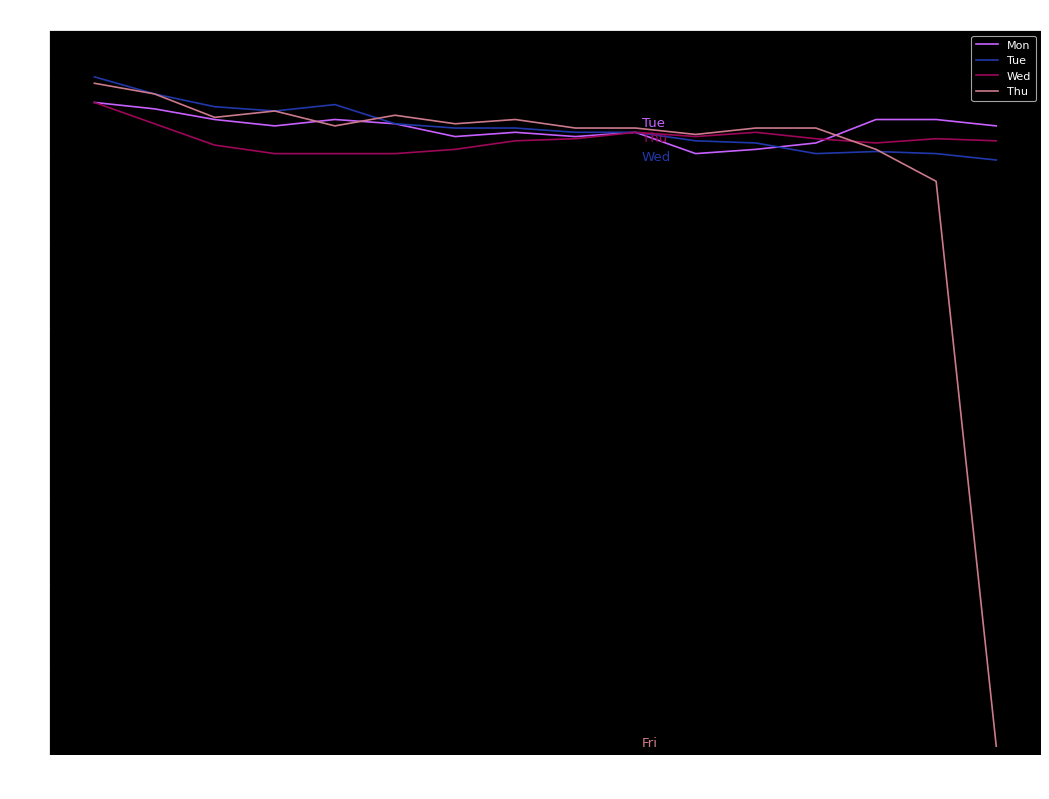

In [26]:
# Prepare data for seasonal plot on a weekly basis (acceleration)

weeks=df_hour_january['weekday'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(weeks), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, m in enumerate(weeks):
    if i > 0:        
        plt.plot('hour', 'acceleration', data=df_hour_january.loc[df_hour_january.weekday==m, :], color=mycolors[i], label=m)
        plt.text(df_hour_january.loc[df_hour_january.weekday==m, :].shape[0]-.9, df_hour_january.loc[df_hour_january.weekday==m, 'acceleration'][-1:].values[0], m, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set( ylim=(0, 17), ylabel='$acceleration$', xlabel='$Day of the week$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of acceleration by day of the week", fontsize=20)
plt.legend(weeks)
plt.show()

In [42]:
df_hour_without_filter = df.resample('H',on='time').median()
df_hour_without_filter.fillna(method='backfill',inplace= True)

df_hour_without_filter

acceleration  temperature  velocity
time                                                    
2021-12-09 09:00:00         14.75        28.00       1.4
2021-12-09 10:00:00         14.20        28.00       1.4
2021-12-09 11:00:00         14.45        28.10       1.4
2021-12-09 12:00:00         14.25        28.00       1.4
2021-12-09 13:00:00         14.45        28.10       1.4
...                           ...          ...       ...
2022-06-09 05:00:00          0.20        36.10       0.0
2022-06-09 06:00:00         14.65        28.15       1.6
2022-06-09 07:00:00         14.40        29.80       1.7
2022-06-09 08:00:00         14.20        30.30       1.6
2022-06-09 09:00:00         14.10        30.50       1.6

[4369 rows x 3 columns]

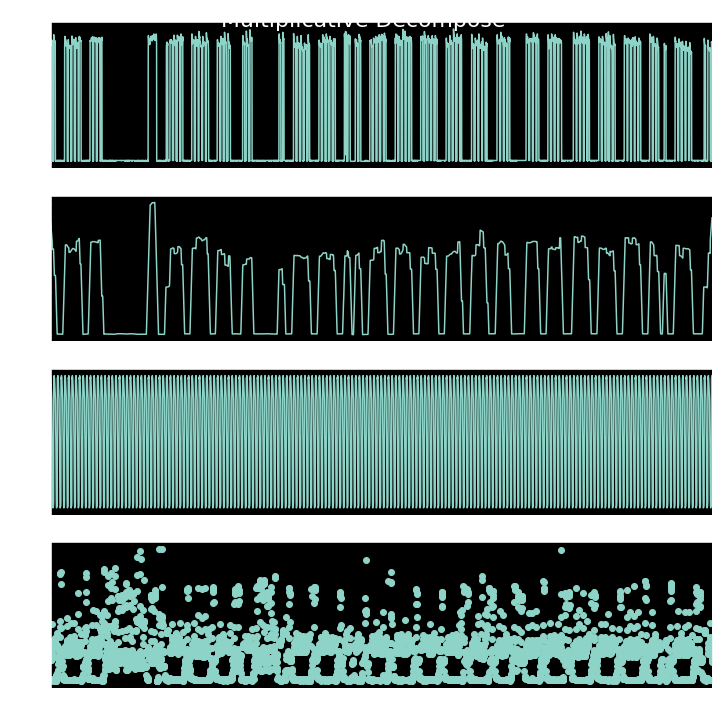

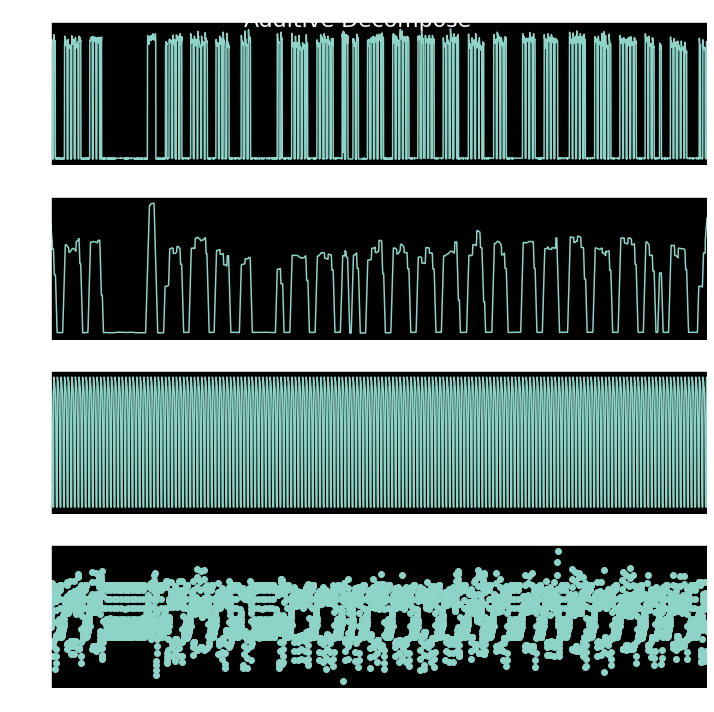

In [28]:
#Lets do some seasonality calculation adn division, we can start with additive time series
# Value = Base Level + Trend + Seasonality + Error

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_hour_without_filter['acceleration'], model='multiplicative', extrapolate_trend='freq', period=24)

# Additive Decomposition
result_add = seasonal_decompose(df_hour_without_filter['acceleration'], model='additive', extrapolate_trend='freq', period=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [29]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
dfa_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
dfa_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
dfa_reconstructed.head()

seas      trend     resid  actual_values
time                                                             
2021-12-09 09:00:00  1.510858  12.904013  0.756560          14.75
2021-12-09 10:00:00  1.490656  12.696316  0.750297          14.20
2021-12-09 11:00:00  1.489806  12.488619  0.776647          14.45
2021-12-09 12:00:00  1.457807  12.280922  0.795947          14.25
2021-12-09 13:00:00  1.436196  12.073225  0.833356          14.45

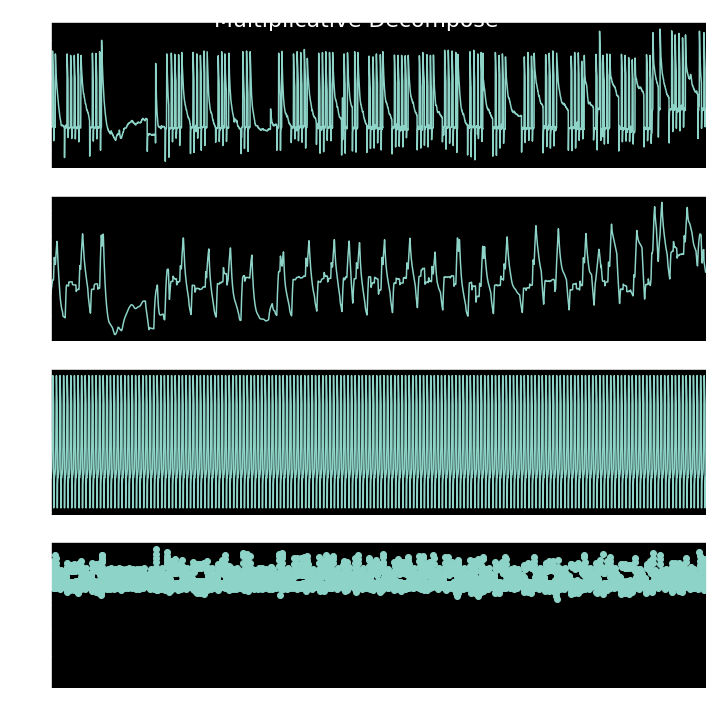

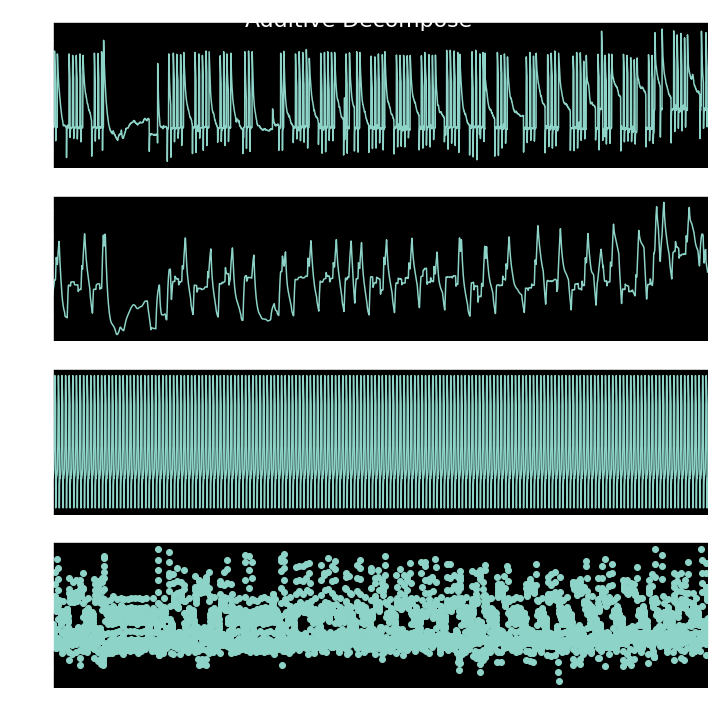

In [30]:
#Lets do some seasonality calculation adn division, we can start with additive time series temperature
# Value = Base Level + Trend + Seasonality + Error

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_hour_without_filter['temperature'], model='multiplicative', extrapolate_trend='freq', period=24)

# Additive Decomposition
result_add = seasonal_decompose(df_hour_without_filter['temperature'], model='additive', extrapolate_trend='freq', period=24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [31]:
#Let´s explore forecasting, we can make series stationary and try to forecast from there
#To see if a series is stationary we can do Unit root testing or we could split the series in 2 contiguous parts and see if they have the same metrics (like mean/variance)
# Augmented Dickey Fuller test (ADH Test)
# Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
# Philips Perron test (PP Test)

In [32]:
# ADF Test
# The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.
# The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.
result = adfuller(df_hour_without_filter.acceleration.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_hour_without_filter.acceleration.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.383730198554211
p-value: 2.470329995222341e-13
Critial Values:
   1%, -3.4318572957996283
Critial Values:
   5%, -2.8622060395015168
Critial Values:
   10%, -2.567124537453565

KPSS Statistic: 0.219290
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\Users\joses\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


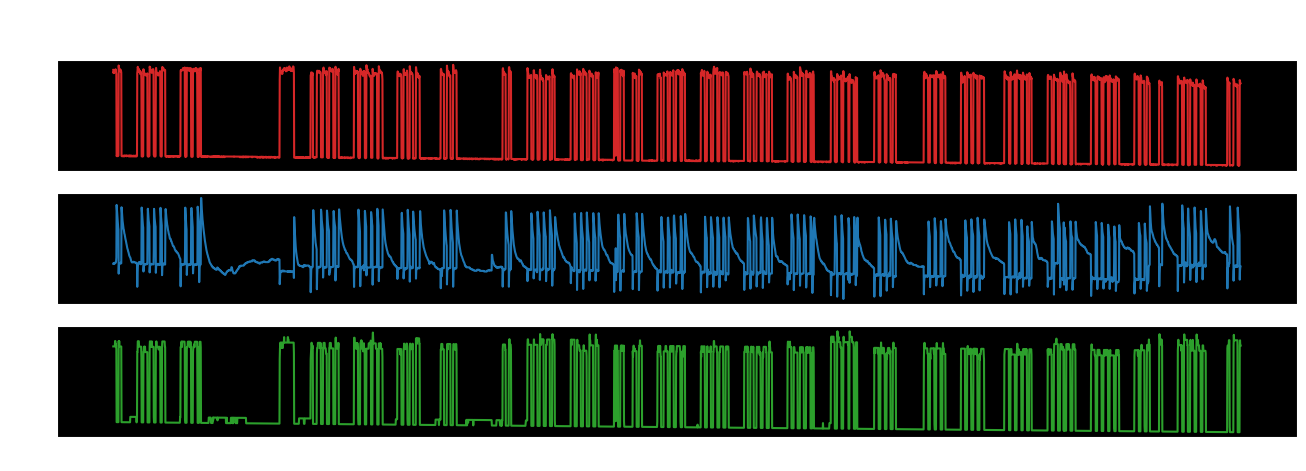

In [33]:
#Detrend a timeseries
# Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
# Subtract the trend component obtained from time series decomposition we saw earlier.

# Subtract the mean

# Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.
fig,(ax1, ax2, ax3) = plt.subplots(3,figsize=(16,5), dpi= 100)
detrendeda = signal.detrend(df_hour_without_filter.acceleration.values)
detrendedt = signal.detrend(df_hour_without_filter.temperature.values)
detrendedv = signal.detrend(df_hour_without_filter.velocity.values)
fig.suptitle('Detrend, Acceleration, temperature, velocity')
ax1.plot(detrendeda, color='tab:red')
ax1.set(ylabel= 'm/s2')
ax2.set(ylabel= 'Celsius')
ax3.set(ylabel= 'mm/s')
ax2.plot(detrendedt, color='tab:blue')
ax3.plot(detrendedv, color='tab:green')
# plt.figure(figsize=(16,5), dpi=100)
# plt.plot(detrendeda)


Text(0.5, 1.0, 'Acceleration detrended by subtracting the trend component')

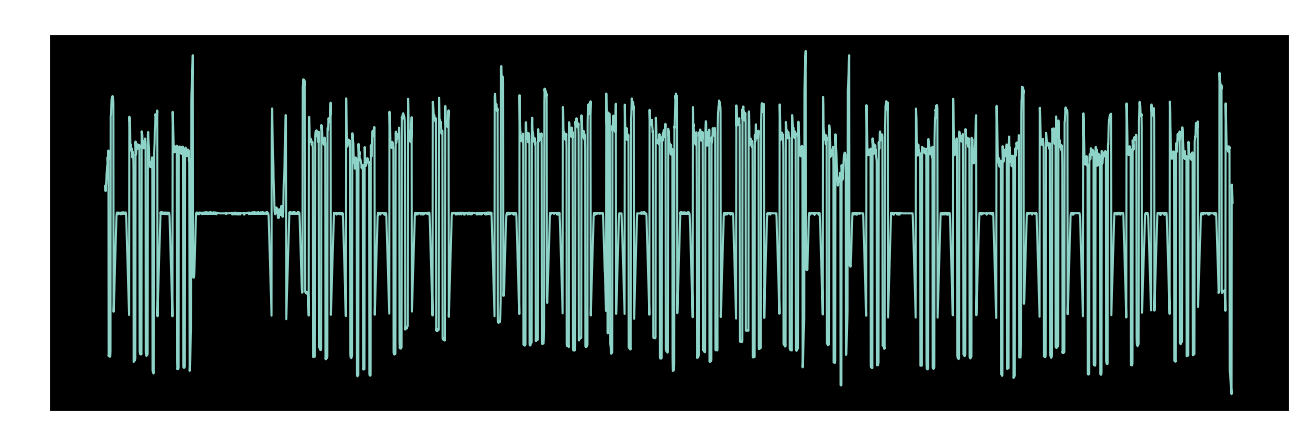

In [34]:
# Using statmodels: Subtracting the Trend Component.
result_mul = seasonal_decompose(df_hour_without_filter['acceleration'], model='multiplicative', extrapolate_trend='freq', period=24)
detrended = df_hour_without_filter.acceleration.values - result_mul.trend
plt.figure(figsize=(16,5), dpi=100)
plt.plot(detrended)
plt.title('Acceleration detrended by subtracting the trend component', fontsize=16)

[]

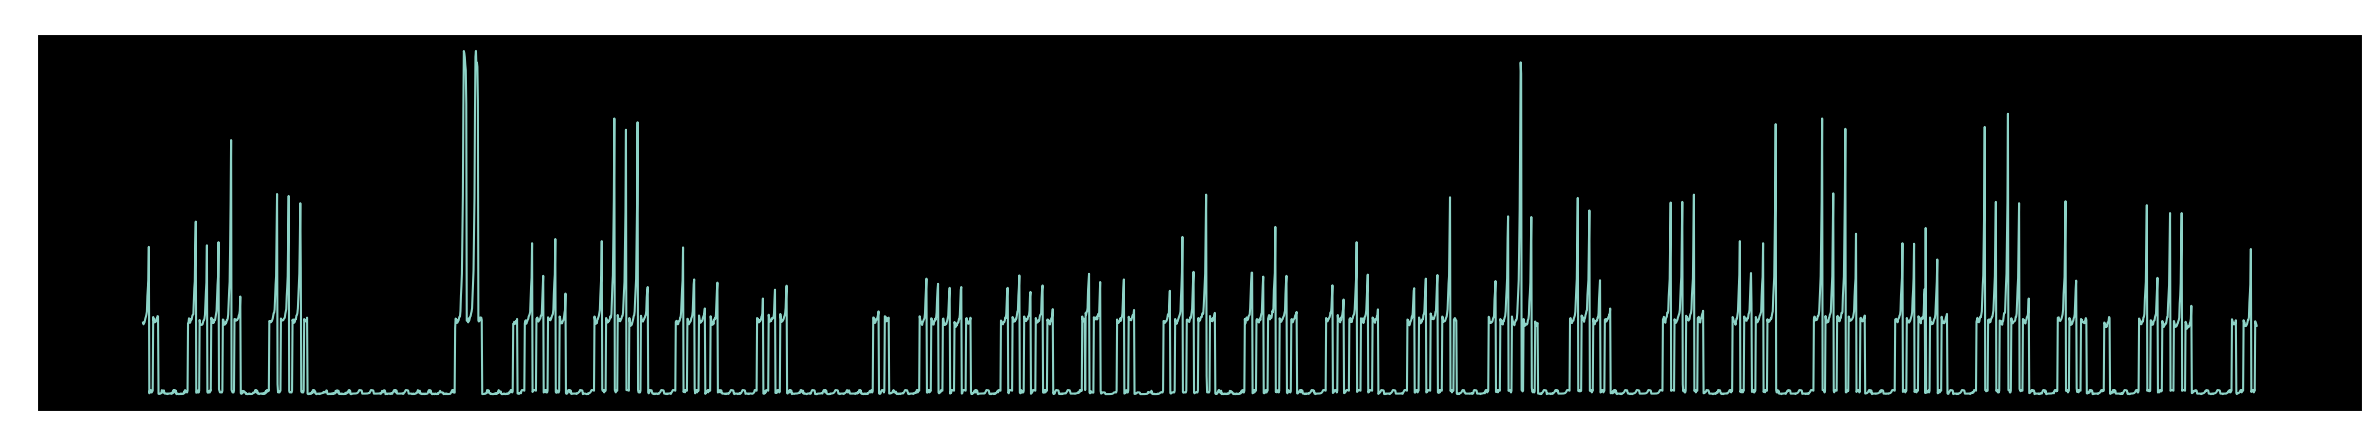

In [35]:
#Deseasonalize
# - 1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

# - 2. Seasonal difference the series (subtract the value of previous season from the current value)

# - 3. Divide the series by the seasonal index obtained from STL decomposition

# Time Series Decomposition
result_mul = seasonal_decompose(df_hour_without_filter['acceleration'], model='multiplicative', extrapolate_trend='freq', period=24)

# Deseasonalize
deseasonalized = df_hour_without_filter.acceleration.values / result_mul.seasonal

# Plot
plt.figure(figsize=(30,5), dpi=100)
plt.plot(deseasonalized)
plt.title('Acceleration Deseasonalized', fontsize=16)
plt.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

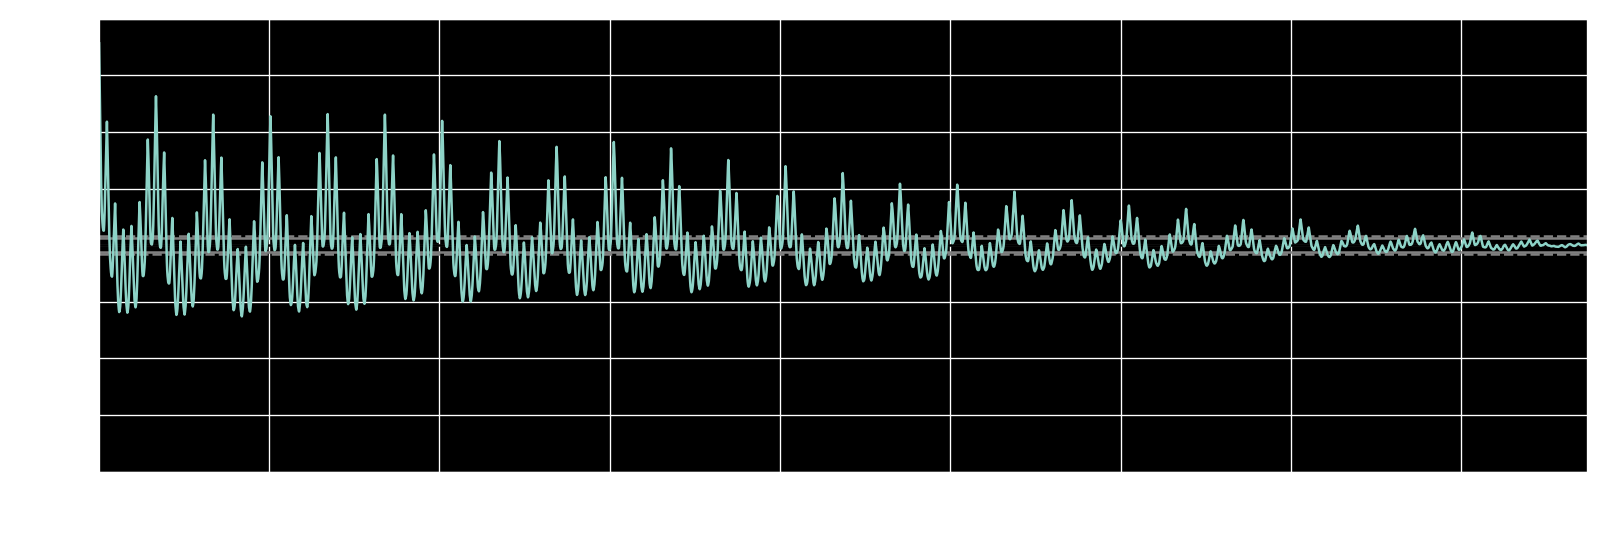

In [36]:
# Test for seasonality
# The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:
# Hour of day
# Day of month
# Weekly
# Monthly
# Yearly
# However, if you want a more definitive inspection of the seasonality, use the Autocorrelation Function (ACF) plot. 
# More on the ACF in the upcoming sections. But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.
plt.rcParams.update({'figure.figsize':(16,5), 'figure.dpi':120})
autocorrelation_plot(df_hour_without_filter.acceleration.tolist())

c:\Users\joses\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


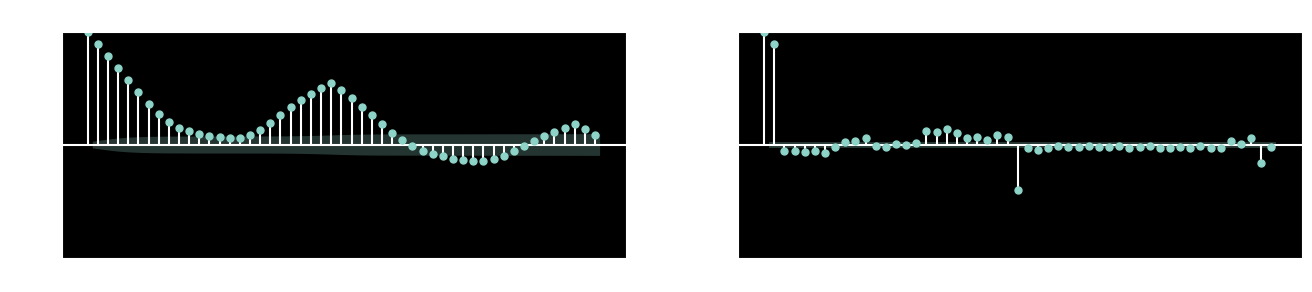

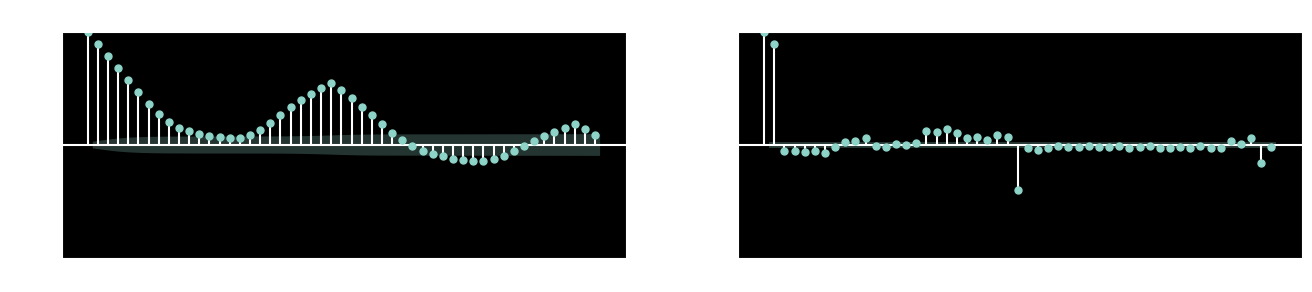

In [37]:
#Autocorrelation and partial correlation
# Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.
# Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Calculate ACF and PACF upto 50 lags
acf_50 = acf(df_hour_without_filter.acceleration, nlags=50)
pacf_50 = pacf(df_hour_without_filter.acceleration, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_hour_without_filter.acceleration.tolist(), lags=50, ax=axes[0])
plot_pacf(df_hour_without_filter.acceleration.tolist(), lags=50, ax=axes[1])

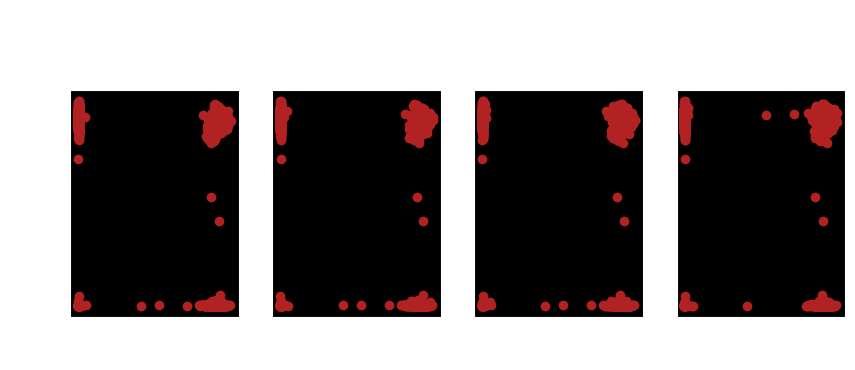

In [38]:
#Lag Plots
# A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. 
# If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_hour_without_filter.acceleration, lag=i+30, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    
   
plt.show()

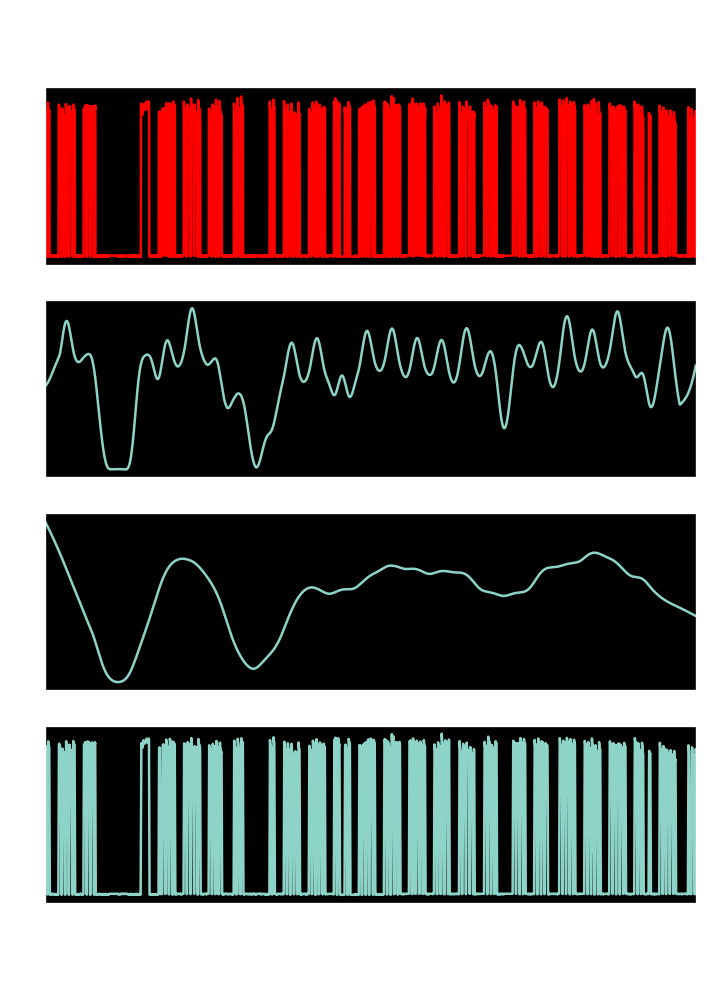

In [39]:
#Smoothen a time series
from statsmodels.nonparametric.smoothers_lowess import lowess
# 1. Moving Average
df_ma = df_hour_without_filter.acceleration.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_hour_without_filter.acceleration, np.arange(len(df_hour_without_filter.acceleration)), frac=0.05)[:, 1], index=df_hour_without_filter.index, columns=['acceleration'])
df_loess_15 = pd.DataFrame(lowess(df_hour_without_filter.acceleration, np.arange(len(df_hour_without_filter.acceleration)), frac=0.15)[:, 1], index=df_hour_without_filter.index, columns=['acceleration'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 9), sharex=True, dpi=120)
df_hour_without_filter['acceleration'].plot(ax=axes[0], color='red', title='Original Series')
df_loess_5['acceleration'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['acceleration'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()